In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [30]:
x_train = np.loadtxt(r'C:\Users\ameya\Downloads\input.csv',delimiter=',')
y_train = np.loadtxt(r"C:\Users\ameya\Downloads\labels.csv",delimiter=',')

x_test = np.loadtxt(r'C:\Users\ameya\Downloads\input_test.csv',delimiter=',')
y_test = np.loadtxt(r"C:\Users\ameya\Downloads\labels_test.csv",delimiter=',')

In [31]:
print('Shape of x_train :- ',x_train.shape)
print('Shape of y_train :- ',y_train.shape)
print('Shape of x_test :- ',x_test.shape)
print('Shape of y_test :- ',y_test.shape)

Shape of x_train :-  (2000, 30000)
Shape of y_train :-  (2000,)
Shape of x_test :-  (400, 30000)
Shape of y_test :-  (400,)


In [32]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [33]:
print('Shape of x_train :- ',x_train.shape)
print('Shape of y_train :- ',y_train.shape)
print('Shape of x_test :- ',x_test.shape)
print('Shape of y_test :- ',y_test.shape)

Shape of x_train :-  (2000, 100, 100, 3)
Shape of y_train :-  (2000, 1)
Shape of x_test :-  (400, 100, 100, 3)
Shape of y_test :-  (400, 1)


In [34]:
x_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [35]:
x_train = x_train / 255
x_test = x_test / 255

In [36]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

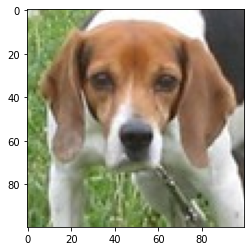

In [37]:
idx1 = random.randint(0,len(x_train))

plt.imshow(x_train[idx1,:])
plt.show()

In [38]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
H = model.fit(x_train,y_train,epochs = 10,batch_size = 64)

Epoch 1/10
32/32 [==============================] - 8s 257ms/step - loss: 0.0226 - accuracy: 0.9985
Epoch 2/10
32/32 [==============================] - 8s 250ms/step - loss: 0.0167 - accuracy: 0.9990
Epoch 3/10
32/32 [==============================] - 8s 254ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 8s 242ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 8s 247ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 8s 248ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 8s 259ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 9s 281ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 8s 257ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 9s 265ms/step - loss: 0.0021 - accuracy: 1.0000

In [60]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 30ms/step - loss: 1.4601 - accuracy: 0.6850


[1.4600902795791626, 0.6850000023841858]

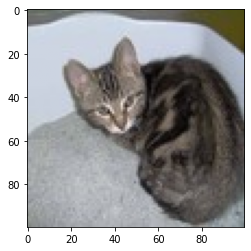

1/1 [==============================] - 0s 22ms/step
It is a Cat


In [68]:
idx2 = random.randint(0,len(y_test))

plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
    
print('It is a',pred)

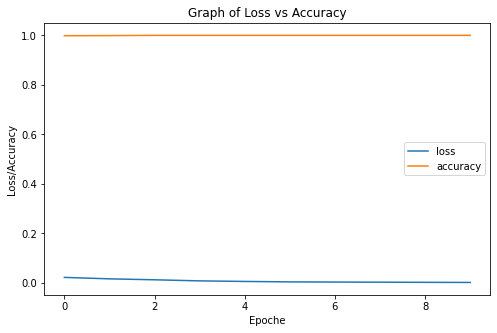

In [64]:
pd.DataFrame(H.history).plot(figsize=(8,5))
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epoche")
plt.title("Graph of Loss vs Accuracy")
plt.show()